<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Crime-and-Unemployment---practical" data-toc-modified-id="Crime-and-Unemployment---practical-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Crime and Unemployment - practical</a></span><ul class="toc-item"><li><span><a href="#Firstly-let’s-look-at-our-data.-This-is-the-most-important-part-of-econometrics,-and" data-toc-modified-id="Firstly-let’s-look-at-our-data.-This-is-the-most-important-part-of-econometrics,-and-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Firstly let’s look at our data. This is the most important part of econometrics, and</a></span></li><li><span><a href="#hist" data-toc-modified-id="hist-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hist</a></span></li><li><span><a href="#state-with-highest-violence" data-toc-modified-id="state-with-highest-violence-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>state with highest violence</a></span></li><li><span><a href="#summary" data-toc-modified-id="summary-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>summary</a></span></li><li><span><a href="#unemployment-and-violent-crime-rates" data-toc-modified-id="unemployment-and-violent-crime-rates-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>unemployment and violent crime rates</a></span></li><li><span><a href="#correlation" data-toc-modified-id="correlation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>correlation</a></span></li><li><span><a href="#OLS-violence-~-uneployment" data-toc-modified-id="OLS-violence-~-uneployment-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>OLS violence ~ uneployment</a></span></li><li><span><a href="#coef_-of-unempl" data-toc-modified-id="coef_-of-unempl-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>coef_ of unempl</a></span></li><li><span><a href="#1std-increase-in-unemp" data-toc-modified-id="1std-increase-in-unemp-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>1std increase in unemp</a></span></li><li><span><a href="#1std-increase-in-violence" data-toc-modified-id="1std-increase-in-violence-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>1std increase in violence</a></span></li><li><span><a href="#qn" data-toc-modified-id="qn-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>qn</a></span></li><li><span><a href="#qn" data-toc-modified-id="qn-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>qn</a></span></li><li><span><a href="#qn" data-toc-modified-id="qn-1.13"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>qn</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

# Crime and Unemployment - practical
In this question we are going to examine the relationship between rates of violent
crime in the US, and the rate of unemployment. In order to download the data for this
problem set go to:
http://www.oxbridge-tutor.co.uk/#!datasets/culy
and download the sample dataset for problem set 1 - it should be in a Excel 1997-2003
format. Don’t worry if you don’t have Excel on your computer, Gretl is still able to
read the file. Start up Gretl. In order to import the data into Gretl navigate to File
→ Open data → Import → Excel. Then select the file from its location where it was
downloaded to, and click ’open’. Just click ’ok’ of a box opens asking about the row
and column number to start from. Then click ’no’ when asked about whether you
want to give the data a time series or panel interpretation. If the import has worked
you should see three variable names: const, Violence & Unemployment listed in the
Gretl variable window.
The violent crime data comes from the FBI, who have data going back to 1960 by State,
and is defined as, ’the number of victims of violent crime per 100,000 persons per year.’
This particular data comes from 2010. The unemployment rate comes from the United
States Department of Labor, and represents the preliminary estimates of the % of labor
force who were unemployed in 2013.

## Firstly let’s look at our data. This is the most important part of econometrics, and
it is often forgotten. Let’s draw a histogram of the Violence data. Left click on
the ’Violence’ data to select it, then Variable → Frequency distribution, at the top
of the Gretl GUI. Select the number of bins equal to 19, and select the then click
’ok’. A nice histogram should pop up as a figure.

In [4]:
!ls *.xls

nbasal.xls      problemset1.xls


In [6]:
df = pd.read_excel('problemset1.xls')
print(df.shape)
df.head()

(51, 3)


,State,Unemployment,Violence
0,Alabama,7.2,383.7
1,Alaska,7.0,635.3
2,Arizona,7.7,413.6
3,Arkansas,7.2,503.5
4,California,8.9,439.6


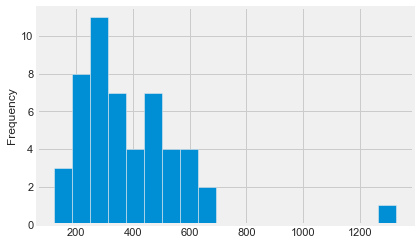

In [7]:
df.Violence.plot.hist(bins=19)

## hist
Draw a similar histogram (with 19 bins) of the Unemployment data, and report
the unemployment rate bin which has the highest frequency.

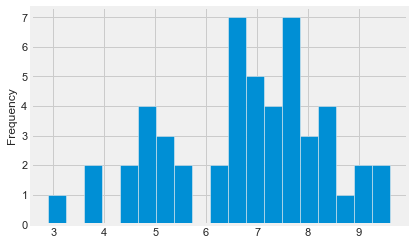

In [8]:
df.Unemployment.plot.hist(bins=19)

## state with highest violence
Can you find out which State has the highest rate of violent crime reported? To
do this you just need to click on the ’Violence’ variable, then look for the state
with the highest violence rate.

In [9]:
df.columns

Index(['State', 'Unemployment', 'Violence'], dtype='object')

In [19]:
df.query('Violence == @df.Violence.max()')

,State,Unemployment,Violence
8,District of Columbia,8.5,1326.8


## summary
Another way of understanding a dataset it to look at its summary statistics.
Gretl provides a nice, and simple way of doing this. In order to view this
information for a given variable, just click ’Variable’ → ’Summary Statistics’.
This will provide a statistical summary of a given variable. Why not have a look
at the Unemployment dataset’s summary statistics?

In [20]:
df['Unemployment'].describe()

count    51.000000
mean      6.764706
std       1.539328
min       2.900000
25%       5.550000
50%       6.900000
75%       7.800000
max       9.600000
Name: Unemployment, dtype: float64

In [29]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(pd.DataFrame(df.Unemployment), check_correlation=False)

profile

Number of variables,1
Number of observations,51
Total Missing (%),0.0%
Total size in memory,488.0 B
Average record size in memory,9.6 B
Numeric,1
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [42]:
pd.DataFrame(profile.get_description()['table'],index=[0])

,n,nvar,total_missing,n_duplicates,memsize,recordsize,NUM,DATE,CONST,CAT,UNIQUE,CORR,RECODED,BOOL,UNSUPPORTED,REJECTED
0,51,1,0.0,18,488.0 B,9.6 B,1,0,0,0,0,0,0,0,0,0


In [41]:
pd.set_option('display.max_columns',500)
profile.get_description()['variables']

,count,distinct_count,p_missing,n_missing,p_infinite,n_infinite,is_unique,mode,p_unique,memorysize,type,mean,std,variance,min,max,range,5%,25%,50%,75%,95%,iqr,kurtosis,skewness,sum,mad,cv,n_zeros,p_zeros,histogram,mini_histogram
Unemployment,51,33,0,0,0,0,False,6.7,0.647059,488,NUM,6.76471,1.53933,2.36953,2.9,9.6,6.7,4.1,5.55,6.9,7.8,8.95,2.25,-0.303839,-0.465861,345,1.2113,0.227553,0,0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."


## unemployment and violent crime rates

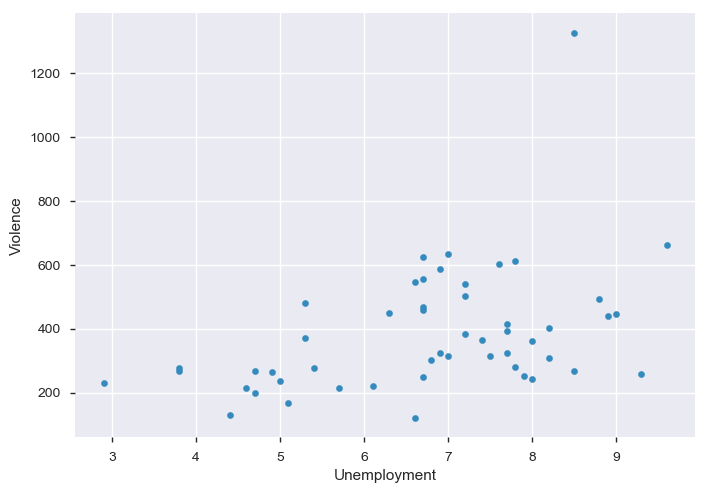

In [43]:
df.plot.scatter(x='Unemployment',y='Violence')

## correlation

In [45]:
df.corr()
# 0.42 means small +ve coreelation

,Unemployment,Violence
Unemployment,1.000000,0.420882
Violence,0.420882,1.000000


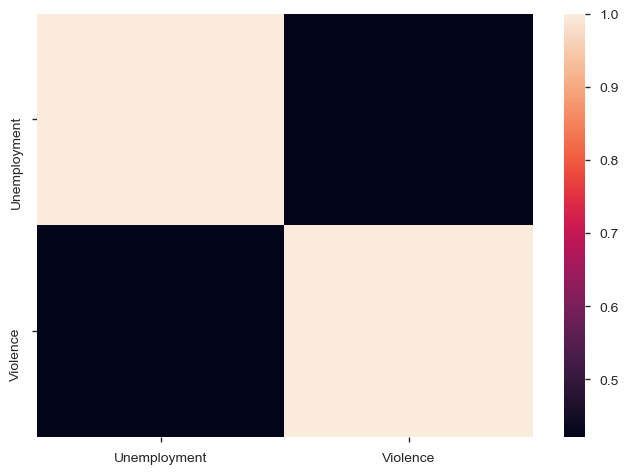

In [46]:
sns.heatmap(df.corr())

## OLS violence ~ uneployment

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [61]:
formula = 'Violence ~ Unemployment'
mod = smf.ols(formula=formula, data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Violence   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Mon, 24 Jun 2019   Prob (F-statistic):            0.00210
Time:                        23:55:38   Log-Likelihood:                -335.84
No. Observations:                  51   AIC:                             675.7
Df Residuals:                      49   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.3979    113.900      0.214      0.831    -204.492     253.288
Unemployment    53.3478     16.426      3.248      0.002      20.339      86.356
==============================================================================
Omnibus:                       43.512   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.095
Skew:                           2.169   Prob(JB):                     3.19e-42
Kurtosis:                      11.433   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
sm.OLS(df.Violence, sm.add_constant(df.Unemployment)).fit().summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Violence   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Mon, 24 Jun 2019   Prob (F-statistic):            0.00210
Time:                        23:57:12   Log-Likelihood:                -335.84
No. Observations:                  51   AIC:                             675.7
Df Residuals:                      49   BIC:                             679.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.3979    113.900      0.214      0.831    -204.492     253.288
Unemployment    53.3478     16.426      3.248      0.002      20.339      86.356
==============================================================================
Omnibus:                       43.512   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.095
Skew:                           2.169   Prob(JB):                     3.19e-42
Kurtosis:                      11.433   Cond. No.                         32.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# help(sm.OLS)

In [67]:
### Using scikit-learn
from sklearn.linear_model import LinearRegression

In [75]:
X = df['Unemployment'].values
X = X.reshape(-1,1)
X.shape

(51, 1)

In [76]:
y = df.Violence.values

In [77]:
linreg = LinearRegression().fit(X,y)
linreg.score(X,y)

0.17714144837764634

In [78]:
linreg.coef_

array([53.34784767])

In [79]:
linreg.intercept_

24.3978931863698

## coef_ of unempl
What is the coefficient on ’Unemployment’? What is the interpretation of this
value?

In [80]:
linreg.coef_

array([53.34784767])

The coefficient on unemployment is approximately 53. This suggests that for
a 1% increase in unemployment, on average there tends to be 53 more cases of
violence per 100,000 people.

## 1std increase in unemp
What would this model predict would be the increase in the rate of violent crime
for a 1 standard deviation increase in unemployment? What is this increase in
terms of standard deviations of the rate of violence?

In [81]:
df.Unemployment.std()

1.5393275842927996

In [82]:
df.Violence.std()

195.11374223217373

The standard deviation of unemployment can be seen from its summary statistics,
and is 1.5. An increase in unemployment by 1.5 will result in an increase in the
rate of violence by 1.5×53 ≈ 82 cases on average per 100,000 people. The standard
deviation in ’Violence’ is 195. So in terms of standard deviations, the 82.0 cases
equates to approximately 0.42 s.d.

## 1std increase in violence
What does a regression of the rate of unemployment on violent crime rates (the
other way round to that in the last part) suggest would be the increase in the
unemployment rate for a 1 standard deviation increase in the rate of violent
crime?

In [83]:
X = df['Violence'].values
X = X.reshape(-1,1)
y = df.Unemployment.values

linreg = LinearRegression().fit(X,y)

linreg.intercept_, linreg.coef_

(5.485382916684997, array([0.0033205]))

In [84]:
sm.OLS(df.Unemployment, sm.add_constant(df.Violence)).fit().summary()

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     10.55
Date:                Tue, 25 Jun 2019   Prob (F-statistic):            0.00210
Time:                        00:30:07   Log-Likelihood:                -88.888
No. Observations:                  51   AIC:                             181.8
Df Residuals:                      49   BIC:                             185.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4854      0.441     12.449      0.000       4.600       6.371
Violence       0.0033      0.001      3.248      0.002       0.001       0.005
==============================================================================
Omnibus:                        0.760   Durbin-Watson:                   2.405
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.816
Skew:                          -0.140   Prob(JB):                        0.665
Kurtosis:                       2.447   Cond. No.                         962.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results of this regression are shown below. An increase in violence by 195.32
is associated with an average increase in the unemployment rate by 0.66%.

## qn
Can you use this regression to uncover what it suggests the increase in unemployment associated with a 1 standard deviation increase in violent crime? Is
this the same as we found previously? Why is this the same/different?

Making ’Violence’ the subject of the above regression model yields:

Violence = (1/0.0034) × Unemployment − (1/0.0034) × 5.589
Or more neatly.


Violence = 294.11 × Unemployment − 1643.82

Note that this is completely different to the results which we obtained from our
OLS regression of ’Violence’ on ’Unemployment’. This is because of the fact that
the regression of y on x is not the same as the regression of x on y. The former
minimises square distances of ’y’ from the line, whereas the latter minimises
square distances in ’x’. Rearranging the latter regression equation will hence not
yield the former. For example this model suggests that a 1.58% increase in the
unemployment rate will increase violence rates by 467.6! Very different to the
previous estimate.

## qn
What can you conclude about the causal mechanism between violent crime and
unemployment based on the two regressions you have run? Does violent crime
cause unemployment or vice versa?

Based on these data alone it is impossible to understand fully the causal mechanism. In my view it is unlikely that violence causes unemployment from a
theoretical standpoint, but it is impossible to say whether unemployment causes
violence, or whether they are simply both correlated/caused by a third unknown
factor.

## qn
Why might it be incorrect to conclude that increases in unemployment lead to
increases in rates of violent crime?

There are a number of factors which are correlated with violence, which could
also be correlated with unemployment. Examples of this might be ethnic fractionalisation, or some measure of geography. These would need to be explictly
controlled for in a regression before any conclusions are made, since omitted
variable bias in the estimation of the effect of unemployment on violence is likely
rife.